In [1]:
from fastai.tabular import *

In [2]:
path = Path('./covid19_ml_education')

In [3]:
path.ls()

[PosixPath('covid19_ml_education/covid_ml.csv'),
 PosixPath('covid19_ml_education/covid19_ml_education.Rmd'),
 PosixPath('covid19_ml_education/LICENSE'),
 PosixPath('covid19_ml_education/models'),
 PosixPath('covid19_ml_education/covid19_ml_education.nb.html'),
 PosixPath('covid19_ml_education/COVID19_2020_open_line_list.xlsx'),
 PosixPath('covid19_ml_education/README.md'),
 PosixPath('covid19_ml_education/.git')]

In [22]:
df = pd.read_csv(path/'covid_ml.csv')

## Here I am taking only valid values for regression problem

In [29]:
df = df[df['days_onset_to_admission'].notnull()]

In [30]:
len(df)

641

In [6]:
df.columns

Index(['ID', 'age', 'sex', 'cough', 'fever', 'chills', 'sore_throat',
       'headache', 'fatigue', 'urgency_of_admission',
       'days_onset_to_admission', 'symptoms', 'city', 'province', 'country',
       'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation',
       'date_death_or_discharge', 'source'],
      dtype='object')

## This is continuous

In [33]:
y_col = 'days_onset_to_admission'

## Below is categorical

In [32]:
y_col = 'urgency_of_admission'

## Everything below remains the same

In [35]:
cat_names = ['sex', 'cough', 'fever', 'chills','sore_throat', 'headache', 'fatigue']

In [36]:
cont_names = ['age']

In [37]:
procs = [FillMissing, Categorify, Normalize]

In [40]:
test = TabularList.from_df(df.iloc[520:641].copy(), path = path, cat_names = cat_names, cont_names = cont_names)

In [43]:
data = (TabularList.from_df(df, path=path, cat_names = cat_names, cont_names = cont_names, procs = procs)
        .split_by_idx(list(range(520,641)))
        .label_from_df(cols=y_col, label_cls = FloatList)
        .add_test(test)
        .databunch()
)

In [44]:
data.show_batch(rows=10)

sex,cough,fever,chills,sore_throat,headache,fatigue,age_na,age,target
female,No,No,No,No,No,No,False,0.7580,5.0
male,No,No,No,No,No,No,False,0.2394,5.0
male,No,No,No,No,No,No,False,1.2765,7.0
female,No,Yes,Yes,No,Yes,No,False,0.3691,5.0
male,No,No,No,No,No,No,False,-0.9921,7.0
female,No,No,No,No,No,No,False,0.3043,1.0
male,No,No,No,No,No,No,False,-0.7976,7.0
female,No,Yes,No,No,No,No,False,-2.8069,1.0
male,No,No,No,No,No,No,False,-1.3810,3.0
male,No,No,No,No,No,No,False,-0.7328,9.0


## Model

In [46]:
max_y = np.max(df['days_onset_to_admission'])*1.2

In [48]:
y_range = torch.tensor([0, max_y], device = defaults.device)

In [57]:
learn = tabular_learner(data, layers = [200,100], y_range = y_range, metrics = rmse)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


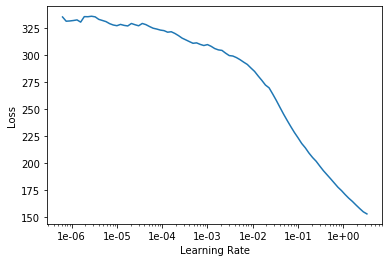

In [58]:
learn.lr_find(); learn.recorder.plot()

In [61]:
learn.fit_one_cycle(10, 1e-1, wd = 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,19.341658,34.786560,5.676008,00:00
1,23.992029,47.009186,6.772113,00:00
2,26.699446,213.653519,14.595117,00:00
3,28.518188,52.498684,6.992021,00:00
4,28.510241,33.623100,5.655744,00:00
5,27.493746,35.639111,5.727894,00:00
6,26.553173,37.784531,5.898561,00:00
7,25.728050,37.318844,5.859699,00:00
8,25.103025,36.580029,5.800918,00:00
9,24.673706,36.831810,5.820598,00:00


In [45]:
row = df.iloc[0]

In [46]:
row

ID                                                                         1
age                                                                       30
sex                                                                     male
cough                                                                     No
fever                                                                     No
chills                                                                    No
sore_throat                                                               No
headache                                                                  No
fatigue                                                                   No
urgency_of_admission                                                     Low
days_onset_to_admission                                                    2
symptoms                                                                 NaN
city                                                 Chaohu City, Hefei City

In [49]:
row.age = 24

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
row.age = 50

In [74]:
row

ID                                                                         1
age                                                                       50
sex                                                                   female
cough                                                                    Yes
fever                                                                    Yes
chills                                                                    No
sore_throat                                                              Yes
headache                                                                 Yes
fatigue                                                                  Yes
urgency_of_admission                                                     Low
days_onset_to_admission                                                    2
symptoms                                                                 NaN
city                                                 Chaohu City, Hefei City

In [75]:
learn.predict(row)

(Category Low, tensor(1), tensor([0.2434, 0.7566]))

In [76]:
test.head()

AttributeError: 'TabularList' object has no attribute 'head'

In [67]:
testdf2 = df.iloc[520:641].copy()

### This is for the continous variable

In [62]:
testdf2 = df.iloc[690:861].copy()

In [68]:
testdf2.head()

,ID,age,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,...,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,date_death_or_discharge,source
616,11814,60.0,male,No,Yes,No,No,No,No,Low,...,Aichi Prefecture,Japan,35.183330,136.900000,point,2020-02-19,2020-02-21,2020-02-22,NaN,https://www3.nhk.or.jp/news/html/20200222/k100...
617,11815,60.0,female,No,Yes,No,No,No,No,Low,...,Aichi Prefecture,Japan,35.183330,136.900000,point,2020-02-19,2020-02-21,2020-02-22,NaN,https://www3.nhk.or.jp/news/html/20200222/k100...
618,11816,40.0,female,No,Yes,No,No,No,No,Low,...,Aichi Prefecture,Japan,35.183330,136.900000,point,2020-02-19,2020-02-21,2020-02-22,NaN,https://www3.nhk.or.jp/news/html/20200222/k100...
619,11818,30.0,female,No,No,No,No,No,No,Low,...,NaN,Singapore,1.374872,103.886403,point,2020-02-16,2020-02-21,2020-02-21,2020-03-02,https://www.moh.gov.sg/news-highlights/details...
621,11865,96.0,female,Yes,Yes,No,No,No,No,Low,...,Hong Kong,China,22.282630,114.188121,point,2020-02-13,2020-02-22,2020-02-22,NaN,https://www.info.gov.hk/gia/general/202002/22/...


In [122]:
testdf2.urgency_of_admission.value_counts()

Low     150
High     21
Name: urgency_of_admission, dtype: int64

In [70]:
testdf2.columns

Index(['ID', 'age', 'sex', 'cough', 'fever', 'chills', 'sore_throat',
       'headache', 'fatigue', 'urgency_of_admission',
       'days_onset_to_admission', 'symptoms', 'city', 'province', 'country',
       'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation',
       'date_death_or_discharge', 'source'],
      dtype='object')

In [89]:
testdf2.drop(columns='', inplace= True)

In [63]:
testdf2.columns

Index(['ID', 'age', 'sex', 'cough', 'fever', 'chills', 'sore_throat',
       'headache', 'fatigue', 'urgency_of_admission',
       'days_onset_to_admission', 'symptoms', 'city', 'province', 'country',
       'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation',
       'date_death_or_discharge', 'source'],
      dtype='object')

In [71]:
row = testdf2.iloc[0]

In [78]:
round(float(str(learn.predict(row)[0])[1:-1]),2)

3.66

In [139]:
testdf.drop(columns='predictions', inplace = True)

In [80]:
testdf2.insert(0, 'predictions','')

In [82]:
for i in range(len(testdf2)):
    row = testdf2.iloc[i][1:]
    testdf2.predictions.iloc[i] = round(float(str(learn.predict(row)[0])[1:-1]),2)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [83]:
testdf2.head()

,predictions,ID,age,sex,cough,fever,chills,sore_throat,headache,fatigue,...,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,date_death_or_discharge,source
616,3.66,11814,60.0,male,No,Yes,No,No,No,No,...,Aichi Prefecture,Japan,35.183330,136.900000,point,2020-02-19,2020-02-21,2020-02-22,NaN,https://www3.nhk.or.jp/news/html/20200222/k100...
617,3.76,11815,60.0,female,No,Yes,No,No,No,No,...,Aichi Prefecture,Japan,35.183330,136.900000,point,2020-02-19,2020-02-21,2020-02-22,NaN,https://www3.nhk.or.jp/news/html/20200222/k100...
618,3.65,11816,40.0,female,No,Yes,No,No,No,No,...,Aichi Prefecture,Japan,35.183330,136.900000,point,2020-02-19,2020-02-21,2020-02-22,NaN,https://www3.nhk.or.jp/news/html/20200222/k100...
619,3.68,11818,30.0,female,No,No,No,No,No,No,...,NaN,Singapore,1.374872,103.886403,point,2020-02-16,2020-02-21,2020-02-21,2020-03-02,https://www.moh.gov.sg/news-highlights/details...
621,4.14,11865,96.0,female,Yes,Yes,No,No,No,No,...,Hong Kong,China,22.282630,114.188121,point,2020-02-13,2020-02-22,2020-02-22,NaN,https://www.info.gov.hk/gia/general/202002/22/...


In [143]:
testdf.predictions.value_counts()

Low     160
High     11
Name: predictions, dtype: int64

In [144]:
testdf[testdf.predictions == 'High']

,predictions,ID,age,sex,cough,fever,chills,sore_throat,headache,fatigue,...,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,date_death_or_discharge,source
703,High,12893,18.0,male,No,No,No,No,No,No,...,Castilla y Leon,Spain,41.767612,-4.780517,admin1,2020-02-24,2020-02-25,2020-02-27,NaN,https://elpais.com/Comentario/1582831600-308e8...
708,High,13459,40.0,female,No,No,Yes,No,Yes,Yes,...,Kanagawa Prefecture,Japan,35.566670,139.366700,point,2020-02-18,NaN,2020-02-27,NaN,https://www.mhlw.go.jp/content/10906000/000601...
712,High,13463,0.0,male,No,Yes,No,No,No,No,...,Hokkaido,Japan,42.817375,141.240905,point,2020-02-18,NaN,2020-02-28,NaN,https://www.mhlw.go.jp/content/10906000/000601...
733,High,14912,NaN,male,No,No,No,No,No,No,...,Hamburg,Germany,53.546610,10.020720,admin1,2020-02-25,2020-02-27,2020-02-27,NaN,https://www.hamburg.de/bgv/pressemeldungen/136...
746,High,15109,NaN,male,No,No,No,No,No,No,...,Baden-Wurttemberg,Germany,47.793360,8.915742,admin2,2020-03-03,NaN,2020-03-04,NaN,https://stm.baden-wuerttemberg.de/de/service/p...
747,High,15259,NaN,male,No,No,No,No,No,No,...,Schleswig-Holstein,Germany,53.920290,10.141090,admin2,2020-02-25,NaN,2020-02-28,NaN,https://www.schleswig-holstein.de/DE/Landesreg...
760,High,18530,12.0,female,No,No,No,No,No,No,...,NaN,Malta,35.923040,14.399690,admin0,2020-03-06,NaN,2020-03-07,NaN,https://news.trust.org/item/20200307102758-m8hf2
762,High,18855,18.0,female,No,No,No,No,No,No,...,Kansas,United States,38.883624,-94.822346,admin2,2020-03-01,2020-03-02,2020-03-07,NaN,https://www.kcur.org/post/first-case-coronavir...
771,High,19877,20.0,female,No,No,No,No,No,No,...,Victoria,Australia,-37.813600,144.963100,point,2020-02-29,NaN,2020-03-10,NaN,https://www2.health.vic.gov.au/about/media-cen...
810,High,20282,30.0,NaN,No,No,No,No,No,No,...,Minnesota,United States,45.019780,-93.099528,admin2,2020-03-06,2020-03-10,2020-03-11,NaN,https://minnesota.cbslocal.com/2020/03/11/coro...
